In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('us_counties.csv')
df.head()

,county,state,population,latitude,longitude
0,Los Angeles,CA,9936690,34.3219,-118.2247
1,Cook,IL,5225367,41.8401,-87.8168
2,Harris,TX,4726177,29.8578,-95.3938
3,Maricopa,AZ,4430871,33.3490,-112.4915
4,San Diego,CA,3289701,33.0343,-116.7351


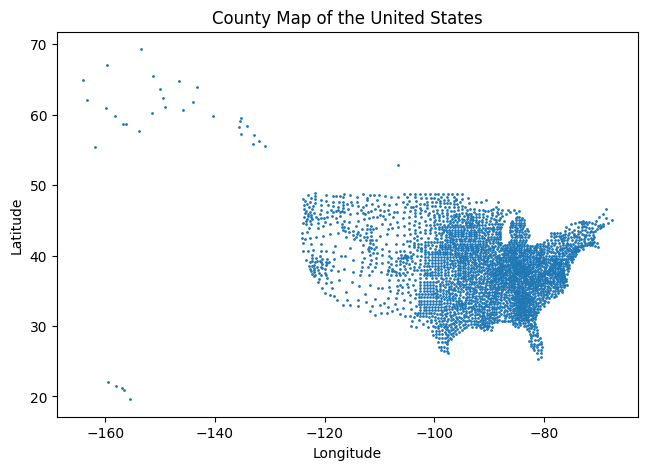

In [101]:
plt.figure(figsize=(7.5,5))
plt.scatter(df['longitude'], df['latitude'], s=1)
plt.title('County Map of the United States')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

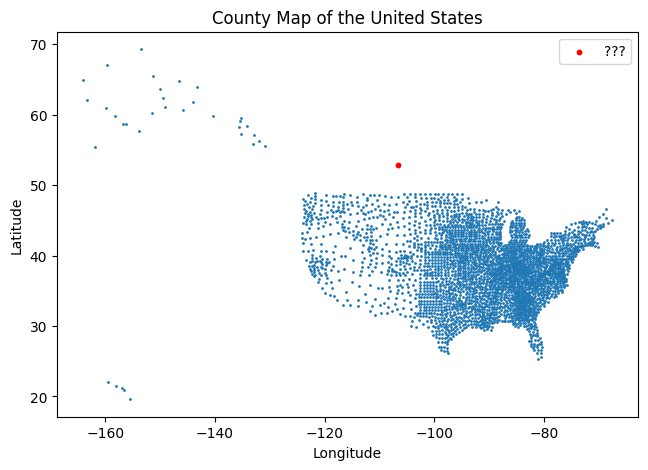

In [105]:
df1 = df[df['latitude'] == 52.7985]

plt.figure(figsize=(7.5,5))
plt.scatter(df['longitude'], df['latitude'], s=1)
plt.scatter(df1['longitude'], df1['latitude'], s=10, c='red', label='???')
plt.title('County Map of the United States')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

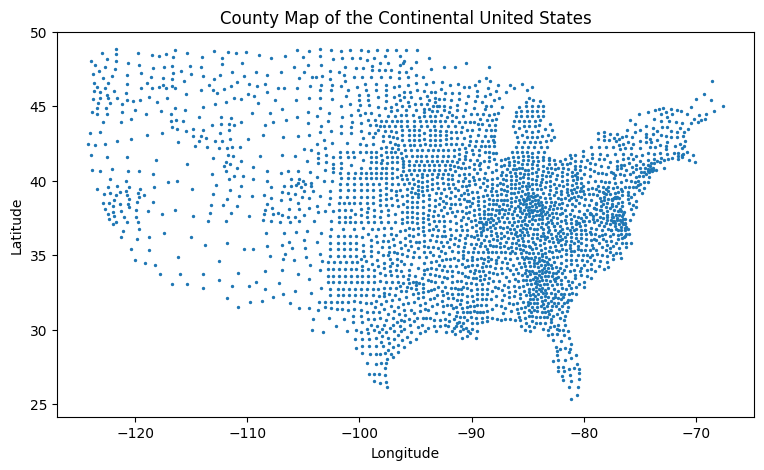

In [12]:
cont_df = df[df['state'] != 'AK']
cont_df = cont_df[cont_df['state'] != 'HI']

plt.figure(figsize=(9,5))
plt.scatter(cont_df['longitude'], cont_df['latitude'], s=2)
plt.title('County Map of the Continental United States')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

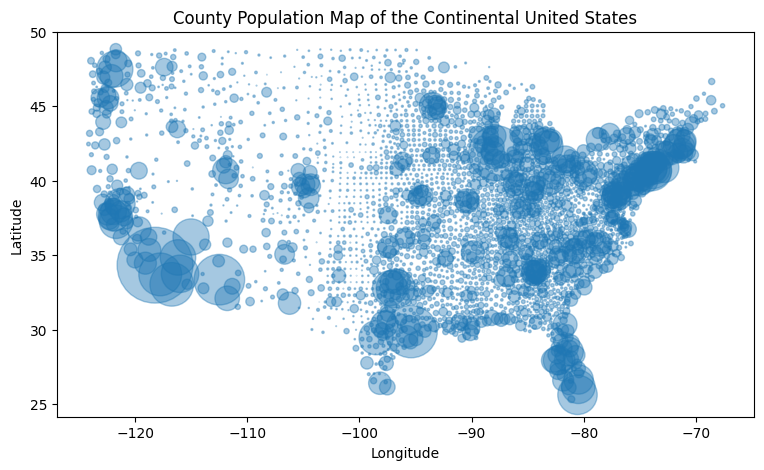

In [45]:
point_size = [0.0003*p for p in cont_df['population']]

plt.figure(figsize=(9,5))
plt.scatter(cont_df['longitude'], cont_df['latitude'], alpha=0.4, s=point_size)
plt.title('County Population Map of the Continental United States')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

`color_spectrum` - List created using [Viridis Palette Generator](https://waldyrious.net/viridis-palette-generator/).

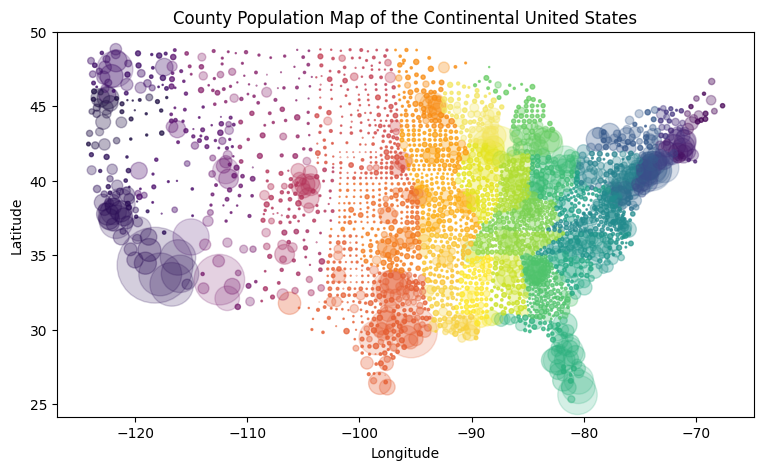

In [46]:
color_spectrum = ['#440154', '#471063', '#481d6f', '#472a7a', '#453781', '#414487', '#3c4f8a', '#375a8c', '#32648e', '#2e6f8e', '#2a788e', '#26828e', '#228b8d', '#1f958b', '#1f9f88', '#22a884', '#2cb17e', '#3bbb75', '#4ec36b', '#63cb5f', '#7ad151', '#95d840', '#b0dd2f', '#cae11f', '#e5e419', '#fde725', '#f3e55d', '#f7d13d', '#fac026', '#fcac11', '#fb9b06', '#f8890c', '#f47918', '#ed6925', '#e55c30', '#da4e3c', '#cf4446', '#c13a50', '#b43359', '#a52c60', '#972766', '#87216b', '#781c6d', '#69166e', '#5a116e', '#4a0c6b', '#3b0964', '#290b55', '#1b0c41', '#0d0829', '#040314', '#000004']
states_by_avg_longitude = ['ME', 'RI', 'MA', 'NH', 'VT', 'CT', 'NJ', 'NY', 'DE', 'MD', 'DC', 'PA', 'VA', 'NC', 'WV', 'SC', 'FL', 'OH', 'GA', 'MI', 'KY', 'TN', 'IN', 'AL', 'IL', 'MS', 'WI', 'LA', 'AR', 'MO', 'IA', 'MN', 'OK', 'KS', 'TX', 'NE', 'SD', 'ND', 'CO', 'NM', 'WY', 'MT', 'AZ', 'UT', 'ID', 'NV', 'WA', 'CA', 'OR']

colors = []
for x in cont_df['state']:
    idx = states_by_avg_longitude.index(x)
    colors.append(color_spectrum[idx])

alpha = [0.2 if p>1000000 else 0.3 if p>100000 else 0.4 if p>50000 else 0.7 for p in cont_df['population']]

plt.figure(figsize=(9,5))
plt.scatter(cont_df['longitude'], cont_df['latitude'], c=colors, alpha=alpha, s=point_size)
plt.title('County Population Map of the Continental United States')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


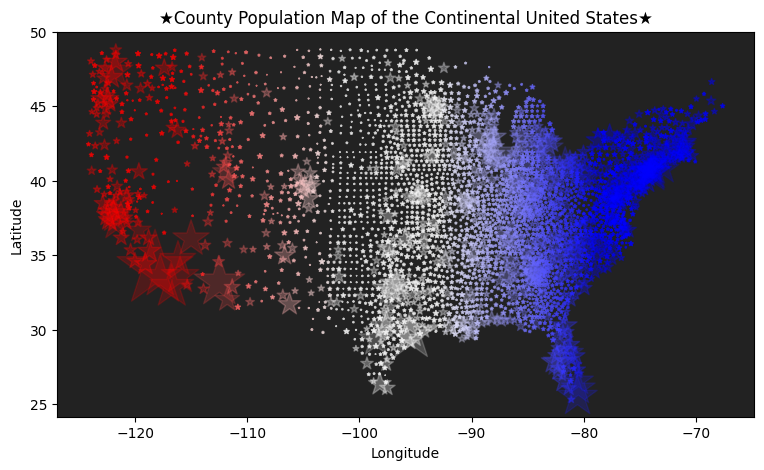

In [81]:
colors = []
for x in cont_df['longitude']:
    y = abs(x)-65
    if y <= 97.5/7.0:
        colors.append('#00f')
    elif y <= 195/7.0:
        rg = round(-255 + (238*y/13))
        colors.append('#%02X%02X%02X' % (rg, rg, 255))
    elif y > 357.5/7.0:
        colors.append('#f00')
    elif y > 260/7.0:
        gb = round(935 - (238*y/13))
        colors.append('#%02X%02X%02X' % (255, gb, gb))
    else:
        colors.append('#fff')

plt.figure(figsize=(9,5))
plt.axes().set_facecolor('#222')
plt.scatter(cont_df['longitude'], cont_df['latitude'], c=colors, alpha=alpha, marker=r"$\star$", s=point_size)
plt.title('★County Population Map of the Continental United States★')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

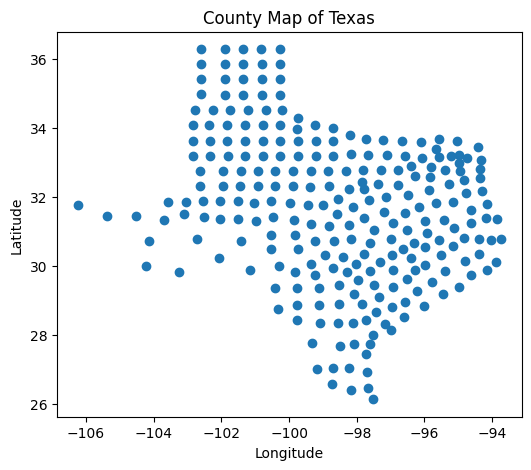

In [63]:
state_df = df[df['state'] == 'TX']
plt.figure(figsize=(6,5))
plt.scatter(state_df['longitude'], state_df['latitude'])
plt.title('County Map of Texas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()